# Eduworth Introduction

Many high schoolers must decide on whether to continue their education after their graduation or not. There are many different paths and oppurtunities that come afterward, but the most encouraged path is to continue education in a college or a university. The problem with this path is that it is very expensive choice and will take many years to obtain the degree. 

Questions<br>
Is college the most financially responsible post-secondary education option?<br>
Does the major of the degree and industry matter when going into college?

## Steps of Project

1. Obtain Data
2. Clean Data
3. Build Visualizations
4. Build/Train A Classification Machine Learning Model


## Data Sources

<a href="https://nces.ed.gov/datalab/index.aspx">National Center for Education Statistics</a> allows us to select variables for the data that they collected from <a href="https://www.data.gov/education/">data.gov</a> and place them onto a table for us to visualize.

<a href="https://collegescorecard.ed.gov/data/">College Scorecard</a><br>
We used this dataset for finding out additional information regarding the performance of students in classes.<br>

<a href="https://research.collegeboard.org/trends/student-aid">Trends in Student Aid 2019</a><br>This dataset gave us information on what kind of loans that students took out in 2019 and how much money they usually would takeout.

## Data Shape Before Cleaning

In the College Scorecard Dataset, there are multiple data files which represent different years. In each file, there were about 1000 columns of different data types and acronyms and even more rows that represent all the different schools. Some of these columns were so specific that we disregarded the information that the column recorded. Also in the College Scorecard Dataset, we had many entries where the information was either null or PrivacySuppressed. Whenever this happened, we would eliminate the row entirely when we pulled information out of it, so it would not mess with our recorded data that we wanted.

The cleaned code below is an example of the cleaning process we did where we would extract the specific columns we are interested in and remove the PrivacySuppressed.

## Cleaning Data Code

In [2]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)

field_data = pd.read_csv('CollegeScorecard_Raw_Data/FieldOfStudyData1516_1617_PP.csv', low_memory = False)
field_data = field_data[['INSTNM', 'MD_EARN_WNE','CIPDESC']]
result = field_data[field_data.MD_EARN_WNE != 'PrivacySuppressed']
result['MD_EARN_WNE'] = result['MD_EARN_WNE'].astype(int)
result = result.groupby(['CIPDESC', 'INSTNM']).mean().astype(int).sort_values('CIPDESC')
result

MD_EARN_WNE
CIPDESC                          INSTNM                                                
Accounting and Computer Science. Lone Star College System                         28100
Accounting and Related Services. Southern Careers Institute-Pharr                 19200
                                 Southern Careers Institute-San Antonio           19200
                                 Southern Illinois University-Carbondale          45850
                                 Southern Illinois University-Edwardsville        51350
...                                                                                 ...
Zoology/Animal Biology.          Ohio State University-Main Campus                23400
                                 Ohio University-Main Campus                      27700
                                 Oregon State University                          20700
                                 Miami University-Oxford                          29300
                                 Weber State University                           23400

[38392 rows x 1 columns]

This is an exmaple of some of the cleaning data that we do. There are large portions of the data that are "PrivacySuppressed” which do not provide any important information.

## Cleaned Data File

We needed to combine the earnings data with that statistics for each school which required the use of ```pd.merge```. This resulted in our final cleaned data file.

In [3]:
result = pd.read_csv('data/best_value_data.csv')
result

,INSTNM,ST_FIPS,STABBR,LATITUDE,LONGITUDE,SAT_AVG,UNITID,OPEID6,CONTROL,MAIN,...,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,BESTVALUE
0,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,25,36250,376,37194,33,33,54300,17.0,16.0,1.497931
1,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,46,31505,327,33085,32,31,25400,24.0,33.0,0.806221
2,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,22,34809,361,36482,33,31,54500,19.0,11.0,1.565687
3,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,PrivacySuppressed,36928,383,38900,24,24,45800,13.0,17.0,1.240251
4,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,39,29956,311,30970,30,30,24000,28.0,28.0,0.801175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,Purdue University Northwest,18,IN,41.584324,-87.474236,1082.0,490805.0,1827,Public,1,...,662,18750,195,21147,388,385,64300,NaN,815.0,3.429333
15869,Purdue University Northwest,18,IN,41.584324,-87.474236,1082.0,490805.0,1827,Public,1,...,162,22438,233,24239,80,80,37900,NaN,155.0,1.689099
15870,Purdue University Northwest,18,IN,41.584324,-87.474236,1082.0,490805.0,1827,Public,1,...,44,22674,235,23887,25,25,36000,NaN,38.0,1.587722
15871,Purdue University Northwest,18,IN,41.584324,-87.474236,1082.0,490805.0,1827,Public,1,...,51,22250,231,24934,24,23,25200,NaN,45.0,1.132584


# Machine Learning

To make classification possible, we needed to add some values to classify on. We were looking at the best value schools and deemed that a value of 1.5 and above would result in a sufficient amount of money to pay off your loans. So a True/False category was added into our dataframe. We tried 3 different parameter sets, (Major), (School), and (School Average)

Our baseline classifier for each of these was the DummyClassifier provided by ```sklearn```

Each graph contains a decision bounder with the points circled black are in a support vector. They are too crowded to see the support vector boundary but they are there.

In [1]:
from classifierClasses import *

Baseline Classifier Accuracy: 0.5217391304347826
SVM Accuracy: 0.9565217391304348


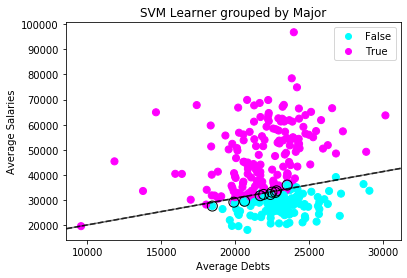

In [2]:
ClassifyByMajor()

Baseline Classifier Accuracy: 0.5127300226871692
SVM Accuracy: 0.9432820771363751


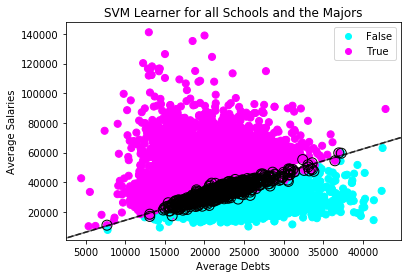

In [3]:
ClassifyByAllSchools()

Baseline Classifier Accuracy: 0.513986013986014
SVM Accuracy: 0.9020979020979021


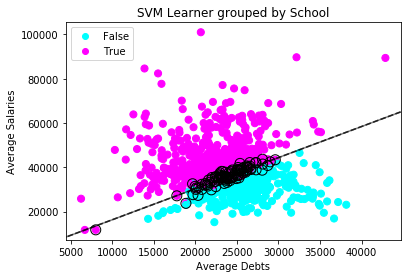

In [4]:
ClassifyBySchool()

Classifying by all schools provides us the best accuracy rate, let's try this using K-Nearest-Neighbors

In [5]:
KNNClassifyByAllSchools()

Baseline Classifier Accuracy: 0.5209790209790209
KNN Accuracy: 0.9090909090909091


K-Nearest Neighbors did not provide a better accuracy rate than our SVM

TODO:
1. Maybe add a visualization?
2. You need to describe with words what you are doing. What are you predicting and what features are you using to predict it?

Our 1.5 value that we based our classification on is stating that this school or major or both is considered a good deal if the average salary is 1.5 that of the average debt. For each entree in each data set we determined this as a boolean true or false value. We ran the SVM classification on 3 sets of data: all schools and their available majors, group by major, group by school. We also ran the KNN classifier on the data set of all schools and their available majors. For each data set we trained the model using 3 features: the average salary, the average debt, and the good investment. We are predicting if given a school, major, or both is a finnacial good investment based on the salary and debt one is likely to graduate with.

# Visualization

![Loan Distribution Data](imgs/loan_dist.png)

This visualizations shows us the most common amount of money taken in loans. This gives us insight on how much going to college costs and why it is a large financial decision to make for upcoming freshman.

Visit https://datastudio.google.com/open/1g6G-O8LygSsjNdDV32BJNbLDH6IjJqIA to see our visualization for the student debt and student earnings (one year post graduation) by major and school in table form. 

This visualization provides an easy way for students to see their prospective choices for a school. This does not provide intution though as how schools compare to each other.

For example, majoring in CS at Duke University the average earnings is 99,600 with a debt of 7,890. Majoring in CS at UIUC earns an average of 92,200 with a debt of 19,500. Comparing this to another university requires directly comparing the values which does not provide a good intution.

Visit https://datastudio.google.com/u/0/reporting/1UYDnVQdFf6_hKf1z2TgFMWtHsNvXl8s6/page/5WZNB to see our visualization for "Best Value" schools on a map of the United States

"Best Value" is where we took students major at each school and divided their earnings one year post graduation by their debt accumulated. This visualization provides prospective students to see what major at what schools provide the best value. You can search by state and by major.

An example is I want to go to school in either Iowa, Illinois, or Indiana and major in Computer Science. The most vibrant blue dot would show the highest value. In this instance Northwestern University provides the best value.

# Results

When high schoolers decide on what college they want to go to, they should first consider what degree they are trying to pursue. As you can see from our visualizations, there are different schools that have a higher value for one major, but weaker for a different major. Once students decide on that, they can find out where the best school is for them based on that and their location.